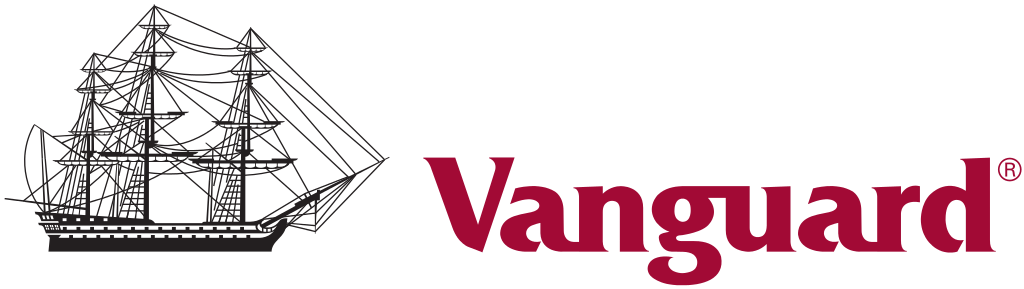

<h1 style="color: #8B2331;">VANGUARD A/B Testing -  Data Cleaning & Wrangling</h1>

<h1 style="color: #8B2331;">00 | Libraries</h1>

In [4]:
# Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical Analysis
import statsmodels.api as sm
from scipy.stats import stats, kurtosis, chi2_contingency
from scipy.stats import probplot, chi2_contingency
from scipy.stats.contingency import association
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline  

# Show all columns in pandas
pd.set_option('display.max_columns', None)

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

<h1 style="color: #8B2331;">01 | Data Extraction</h1>

In [6]:
df_demo = pd.read_csv('df_final_demo.txt', delimiter=',') 
df_experiment_clients = pd.read_csv('df_final_experiment_clients.txt', delimiter=',')
df_web_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',')
df_web_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt')

<h1 style="color: #8B2331;">02 | First Exploration</h1>

In [8]:
dataframes = {
    "df_demo": df_demo,
    "df_experiment_clients": df_experiment_clients,
    "df_web_data_pt_1": df_web_data_pt_1,
    "df_web_data_pt_2": df_web_data_pt_2
}

for name, df in dataframes.items():
    print(f"{name}:")
    display(df.head())

df_demo:


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


df_experiment_clients:


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


df_web_data_pt_1:


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


df_web_data_pt_2:


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


<h1 style="color: #8B2331;">03 | Data Wrangling</h1>

In [10]:
df_web_data = pd.concat([df_web_data_pt_1, df_web_data_pt_2], ignore_index = True)
df_web_data.sample(3)

,client_id,visitor_id,visit_id,process_step,date_time
475683,4789498,729344770_39455810062,741620807_24909581906_933495,start,2017-06-01 13:14:07
333986,4185499,894870334_86969157113,797532862_88341689035_113836,step_3,2017-04-19 12:26:08
463588,8645179,930277076_23067732530,3747363_17823123682_597022,confirm,2017-05-14 09:07:07


In [11]:
df_demo_experiment = pd.merge(df_demo, df_experiment_clients, how = "outer")
df_demo_experiment.sample(3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
39317,5579616,15.0,184.0,63.5,F,2.0,94247.44,3.0,6.0,Control
63905,9046163,15.0,190.0,57.0,F,2.0,43013.58,1.0,4.0,Control
62494,8836806,11.0,141.0,61.5,U,4.0,507002.13,1.0,1.0,NaN


In [12]:
df= pd.merge(df_web_data, df_demo_experiment, how="left", on="client_id")
df.sample(3)

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
749783,7471960,264426328_69070930105,54691793_18305969919_22941,step_3,2017-06-01 17:04:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39490,1660205,605983459_87853134241,8174079_26973868017_807199,step_1,2017-04-24 12:01:34,21.0,263.0,79.0,M,3.0,492266.54,6.0,9.0,Test
65206,3080903,575919082_75325055129,234472111_94542249319_983895,confirm,2017-04-10 18:34:21,9.0,110.0,71.5,M,3.0,1286921.11,6.0,9.0,Test


In [13]:
df.shape

(755405, 14)

<h1 style="color: #8B2331;">04 | Data Cleaning</h1>

In [15]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

column_mapping = {
    'client_id': 'client_id',
    'visitor_id': 'client_dev_id',
    'visit_id': 'session_id',
    'process_step': 'process_step',
    'date_time': 'date_time',
    'clnt_tenure_yr': 'tenure_yr',
    'clnt_tenure_mnth': 'tenure_mo',
    'clnt_age': 'age',
    'gendr': 'gender',
    'num_accts': 'num_accts',
    'bal': 'balance',
    'calls_6_mnth': 'calls_6m',
    'logons_6_mnth': 'num_logons_6m',
    'variation': 'control_test'
}
df.rename(columns=column_mapping, inplace=True)

desired_order = [
    'client_id', 'control_test', 'session_id', 'client_dev_id', 'process_step', 'date_time',
    'age', 'gender', 'balance', 'num_accts',
    'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m' 
]

df = df[desired_order]

In [16]:
df.columns

Index(['client_id', 'control_test', 'session_id', 'client_dev_id',
       'process_step', 'date_time', 'age', 'gender', 'balance', 'num_accts',
       'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m'],
      dtype='object')

In [17]:
round(df.isnull().sum()/len(df)*100, 2)

client_id         0.00
control_test     57.47
session_id        0.00
client_dev_id     0.00
process_step      0.00
date_time         0.00
age              40.47
gender           40.47
balance          40.47
num_accts        40.47
tenure_yr        40.47
tenure_mo        40.47
num_logons_6m    40.47
calls_6m         40.47
dtype: float64

In [18]:
df.nunique()

client_id        120157
control_test          2
session_id       158095
client_dev_id    130236
process_step          5
date_time        629363
age                 165
gender                4
balance           70333
num_accts             8
tenure_yr            54
tenure_mo           482
num_logons_6m         9
calls_6m              8
dtype: int64

In [19]:
df = df.dropna(subset=['control_test'])
round(df.isnull().sum()/len(df)*100, 2)

client_id        0.00
control_test     0.00
session_id       0.00
client_dev_id    0.00
process_step     0.00
date_time        0.00
age              0.04
gender           0.03
balance          0.03
num_accts        0.03
tenure_yr        0.03
tenure_mo        0.03
num_logons_6m    0.03
calls_6m         0.03
dtype: float64

In [20]:
df[['age', 'balance', 'num_accts', 'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m']] = df[['age', 'balance', 'num_accts', 'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m']].fillna(0)

In [21]:
df['gender'] = df['gender'].fillna("U")

In [22]:
df[["session_id", "client_dev_id", "process_step", "date_time"]].duplicated().sum()

4074

In [23]:
df[["session_id", "client_dev_id", "process_step", "date_time"]].duplicated(keep=False).sum()

7123

In [24]:
# duplicates = df[df[["session_id", "client_dev_id", "process_step", "date_time"]].duplicated(keep=False)] 
# display(duplicates)

In [25]:
# 3049 unique combinations of duplicates (7123 - 4074)
# duplicates[['session_id', "client_dev_id", 'process_step', 'date_time']].drop_duplicates().shape[0]

In [26]:
# remove rows where the unique combination of session_id, client_dev_id, process_step, and date_time is duplicated
df = df.drop_duplicates(subset=['session_id', "client_dev_id", 'process_step', 'date_time'], keep='first') 
df.shape    # 321309 - 4074 = 317235

(317235, 14)

In [27]:
df.gender.value_counts()

gender
U    107714
M    106703
F    102810
X         8
Name: count, dtype: int64

In [28]:
df.gender = df.gender.str.replace("X","U")

In [29]:
df.dtypes

client_id          int64
control_test      object
session_id        object
client_dev_id     object
process_step      object
date_time         object
age              float64
gender            object
balance          float64
num_accts        float64
tenure_yr        float64
tenure_mo        float64
num_logons_6m    float64
calls_6m         float64
dtype: object

In [30]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [31]:
columns_to_convert = ['num_accts', 'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m']
df[columns_to_convert] = df[columns_to_convert].fillna(0).astype('Int64')

In [32]:
df.process_step.value_counts()

process_step
start      101153
step_1      68210
step_2      56672
step_3      48264
confirm     42936
Name: count, dtype: int64

In [33]:
# adding numeric prefix to the process_step column values to make it sortable by default
step_order = {'start': '0_start', 'step_1': '1_step', 'step_2': '2_step', 'step_3': '3_step', 'confirm': '4_confirm'}

df['process_step'] = df['process_step'].map(step_order)

In [34]:
# define order for process steps
step_order = ['0_start', '1_step', '2_step', '3_step', '4_confirm']

# convert process_step to an ordered categorical type
df['process_step'] = pd.Categorical(df['process_step'], categories=step_order, ordered=True)

In [35]:
bins = [16, 30, 40, 50, 60, 100]
labels = ['16-30', '31-40', '41-50', '51-60', '61+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['age_group'].value_counts()

age_group
61+      87407
51-60    72679
31-40    55164
41-50    52057
16-30    49816
Name: count, dtype: int64

In [36]:
bins = [0, 50000, 150000, 500000, 1000000, 5000000, float('inf')]
labels = ['0-50k', '50-150k', '150-500k', '500k-1M', '1M-5M', '5M+']

df['balance_segment'] = pd.cut(df['balance'], bins=bins, labels=labels, right=False)

df['balance_segment'].value_counts()

balance_segment
50-150k     126452
0-50k       110923
150-500k     60535
500k-1M      13361
1M-5M         5843
5M+            121
Name: count, dtype: int64

In [37]:
desired_order = [
    'client_id', 'control_test', 'session_id', 'client_dev_id', 'process_step', 'date_time',
    'age', 'age_group', 'gender', 'balance', 'balance_segment', 'num_accts',
    'tenure_yr', 'tenure_mo', 'num_logons_6m', 'calls_6m'  
]

df = df[desired_order]

In [38]:
df.to_pickle("clean_vanguard.pkl")

In [39]:
df.to_csv("clean_vanguard.csv", index=False)